In [11]:
# Application de la régression logistique au jeu de données BC
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Le changement du solver de liblinear vers libfgs engendre un problème de convergence avec un nombre d'itérations
# insuffisant sur un jeu de données non préparé
cancer_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data,
                                                   cancer_dataset.target,
                                                   stratify=cancer_dataset.target,
                                                   random_state=42)
regression_logistique = LogisticRegression(C=1.0,max_iter=10000).fit(X_train,y_train)
print("Score Regression Logistique entrainnement {:.3f}".format(regression_logistique.score(X_train,y_train)))
print("Score Regression logistique test {:.3f}".format(regression_logistique.score(X_test,y_test)))

regression_logistique_c_100 = LogisticRegression(C=100, max_iter=10000).fit(X_train,y_train)
print("Score C=100 [entrainnement]: {:.3f}".format(regression_logistique_c_100.score(X_train,y_train)))
print("Score C=100 [test]: {:.3f}".format(regression_logistique_c_100.score(X_test,y_test)))

regression_logistique_c_001 = LogisticRegression(C=0.001, max_iter=10000).fit(X_train,y_train)
print("Score C=0.001 [entrainnement]: {:.3f}".format(regression_logistique_c_001.score(X_train,y_train)))
print("Score C=0.001 [test]: {:.3f}".format(regression_logistique_c_001.score(X_test,y_test)))


Score Regression Logistique entrainnement 0.958
Score Regression logistique test 0.958
Score C=100 [entrainnement]: 0.984
Score C=100 [test]: 0.965
Score C=0.001 [entrainnement]: 0.953
Score C=0.001 [test]: 0.944


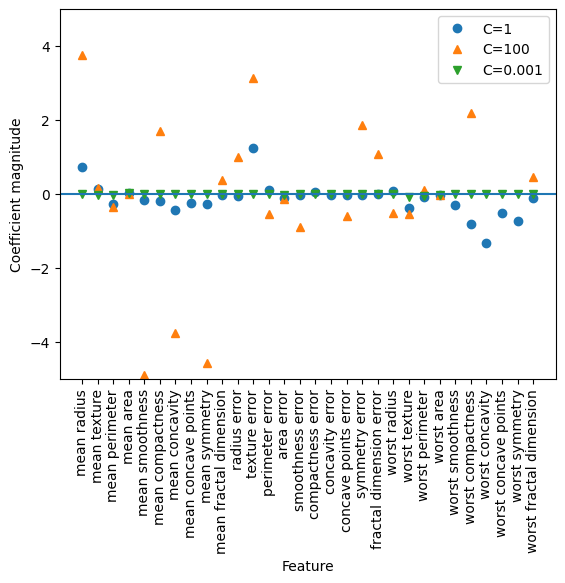

In [19]:
# Valeurs des coefficients pour les différentes valeurs de paramètres

plt.plot(regression_logistique.coef_.T,'o',label="C=1")
plt.plot(regression_logistique_c_100.coef_.T,'^',label="C=100")
plt.plot(regression_logistique_c_001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer_dataset.data.shape[1]),cancer_dataset.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Score Entrainnement : C = 0.001, score = 0.913
Score Test : C = 0.001, score = 0.923
Score Entrainnement : C = 1.000, score = 0.960
Score Test : C = 1.000, score = 0.958
Score Entrainnement : C = 100.000, score = 0.986
Score Test : C = 100.000, score = 0.979


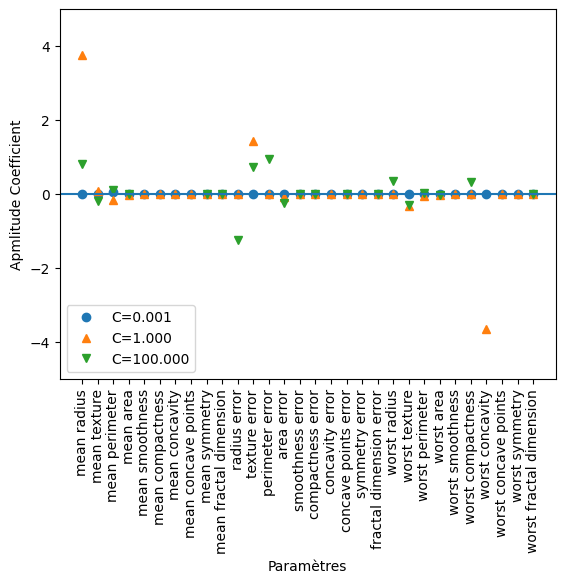

In [31]:
# Valeurs des coefficients lors d'une régularisation L1
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=10000).fit(X_train,y_train)
    print("Score Entrainnement : C = {:.3f}, score = {:.3f}".format(C,lr_l1.score(X_train, y_train)))
    print("Score Test : C = {:.3f}, score = {:.3f}".format(C,lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
          
plt.xticks(range(cancer_dataset.data.shape[1]), cancer_dataset.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("Paramètres")
plt.ylabel("Apmlitude Coefficient")

plt.ylim(-5,5)
plt.legend(loc=3)